# Semi-major axis
This notebook analise the time evolution of the semi-major axis for each planet. 

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import platform

In [2]:
#Matplotlib configure
plt.style.use('ggplot')
font = {'size'   :  16}
matplotlib.rc('font', **font)

In [3]:
def create_columns(simulations):
    """Create a list of columns for dataframe"""
    return ['time'] + ['ss_{}'.format(simulation) for simulation in simulations]


def init_df(planet, simulations):
    """Initialize an empty dataframe"""
    columns = create_columns(simulations)
    df = pd.DataFrame(columns=columns)
    df['time']= np.genfromtxt('{}0/{}.txt'.format(prefix_simulation,planet))[:,0]
    return df


def read_orbital_element(planet, orbital_element, simulations):
    """Read the orbital elements for each planet for all simulations"""
    df = init_df(planet, simulations)
    for simulation in simulations:
        os.chdir('{}{}'.format(prefix_simulation, simulation))
        df['ss_{}'.format(simulation)] = np.genfromtxt('{}.txt'.format(planet))[:,orbital_element]
        os.chdir('..')
    return df


def create_data_planet(planet, orbital_element, simulations):
    """Create data frame for all planets together by each orbital element"""
    oe = {'time':0, 'a':1, 'e':2, 'inc':3, 'capom':4, 'omega':5, 'capm':6, 'peri':7, 'apo':8, 'obar':9}
    list_df_planets = [read_orbital_element(planet, oe[orbital_element], simulations) for planet in planets]
    data_planets = pd.concat(list_df_planets, keys=planets)
    return data_planets

In [11]:
# Paths configuration
if platform.system() == 'Darwin': 
    # Mac
    path_proj = '/Users/sandro/Documents/Projetos/MVS_SS_Circ_Invar4'
    follow_path = '/Users/sandro/Programas/swift/tools'
else:
    # Linux
    path_proj = '/home/sandro/Documentos/Projetos/MVS_SS_Circ_Invar4'
    follow_path = '/home/sandro/Programas/swift/tools'


path_ss_data = 'data/ss'
prefix_simulation = 'ss-'
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']

In [13]:
os.chdir(path_proj)
os.chdir(path_ss_data)
planet = 'Mercury' # for time reference
orbital_element = 'a'
n_lines = 96
simulations = np.arange(n_lines)

In [14]:
data_planet = create_data_planet('Mercury', 'a', simulations)

In [15]:
data_planet

time       ss_0       ss_1       ss_2       ss_3  \
Mercury 0     0.000000e+00   0.387098   0.387098   0.387098   0.387098   
        1     5.000000e+03   0.387098   0.387099   0.387098   0.387098   
        2     1.000000e+04   0.387098   0.387098   0.387099   0.387099   
        3     1.500000e+04   0.387098   0.387098   0.387098   0.387098   
        4     2.000001e+04   0.387099   0.387098   0.387098   0.387098   
        5     2.500001e+04   0.387098   0.387099   0.387099   0.387098   
        6     3.000001e+04   0.387098   0.387098   0.387098   0.387099   
        7     3.500001e+04   0.387097   0.387098   0.387098   0.387098   
        8     4.000001e+04   0.387098   0.387098   0.387099   0.387098   
        9     4.500000e+04   0.387099   0.387098   0.387098   0.387098   
        10    5.000000e+04   0.387098   0.387099   0.387098   0.387098   
        11    5.500000e+04   0.387097   0.387098   0.387099   0.387099   
        12    6.000000e+04   0.387098   0.387098   0.387098   0.387099   
        13    6.500000e+04   0.387098   0.387098   0.387098   0.387098   
        14    7.000000e+04   0.387098   0.387098   0.387099   0.387098   
        15    7.500001e+04   0.387098   0.387097   0.387098   0.387098   
        16    8.000001e+04   0.387097   0.387098   0.387098   0.387099   
        17    8.500001e+04   0.387098   0.387098   0.387099   0.387098   
        18    9.000001e+04   0.387098   0.387099   0.387098   0.387098   
        19    9.500001e+04   0.387097   0.387098   0.387098   0.387098   
        20    1.000000e+05   0.387097   0.387098   0.387098   0.387098   
        21    1.050000e+05   0.387098   0.387098   0.387098   0.387098   
        22    1.100000e+05   0.387099   0.387098   0.387098   0.387098   
        23    1.150000e+05   0.387098   0.387098   0.387098   0.387099   
        24    1.200000e+05   0.387098   0.387098   0.387098   0.387099   
        25    1.250000e+05   0.387098   0.387098   0.387098   0.387099   
        26    1.300000e+05   0.387098   0.387099   0.387098   0.387098   
        27    1.350000e+05   0.387099   0.387098   0.387098   0.387098   
        28    1.400000e+05   0.387098   0.387098   0.387098   0.387098   
        29    1.450000e+05   0.387097   0.387098   0.387098   0.387099   
...                    ...        ...        ...        ...        ...   
Neptune 1971  9.855000e+06  29.864016  30.342525  29.896095  30.141386   
        1972  9.860000e+06  30.050867  30.072344  30.178747  30.094614   
        1973  9.865000e+06  30.031828  30.285639  29.920313  29.929110   
        1974  9.870000e+06  29.850325  30.245592  30.058489  30.179556   
        1975  9.875000e+06  29.913898  30.092087  30.095879  29.934940   
        1976  9.880000e+06  30.138428  30.370136  29.922514  30.207294   
        1977  9.885000e+06  30.082439  30.108244  30.199678  29.995602   
        1978  9.890000e+06  29.852657  30.226126  29.955627  30.015900   
        1979  9.895000e+06  29.887726  30.308018  30.121681  30.134306   
        1980  9.900000e+06  30.076670  30.078327  30.132072  29.957308   
        1981  9.905000e+06  30.009491  30.343092  29.978058  30.233898   
        1982  9.910000e+06  29.823315  30.178429  30.243162  29.919312   
        1983  9.915000e+06  29.923626  30.154184  29.971323  30.102737   
        1984  9.920000e+06  30.145441  30.360424  30.147858  30.050833   
        1985  9.925000e+06  30.060593  30.071541  30.121298  30.030691   
        1986  9.930000e+06  29.858145  30.301405  29.965275  30.211777   
        1987  9.935000e+06  29.922350  30.244820  30.218641  29.895283   
        1988  9.940000e+06  30.080252  30.104122  29.926855  30.155071   
        1989  9.945000e+06  29.975342  30.360399  30.107531  29.963781   
        1990  9.950000e+06  29.812656  30.116234  30.065443  30.120287   
        1991  9.955000e+06  29.953531  30.224047  29.919102  30.133574   
        1992  9.960000e+06  30.144485  30.310026  30.173141  29.934116   
        1993  9.965000e+06

In [17]:
mercury = data_planet.loc['Mercury']

In [18]:
mercury

,time,ss_0,ss_1,ss_2,ss_3,ss_4,ss_5,ss_6,ss_7,ss_8,...,ss_86,ss_87,ss_88,ss_89,ss_90,ss_91,ss_92,ss_93,ss_94,ss_95
0,0.000000e+00,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,...,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098
1,5.000000e+03,0.387098,0.387099,0.387098,0.387098,0.387098,0.387098,0.387098,0.387099,0.387098,...,0.387098,0.387099,0.387098,0.387098,0.387099,0.387098,0.387098,0.387098,0.387098,0.387099
2,1.000000e+04,0.387098,0.387098,0.387099,0.387099,0.387097,0.387098,0.387098,0.387099,0.387098,...,0.387098,0.387098,0.387099,0.387098,0.387098,0.387098,0.387098,0.387098,0.387099,0.387098
3,1.500000e+04,0.387098,0.387098,0.387098,0.387098,0.387097,0.387099,0.387099,0.387099,0.387098,...,0.387098,0.387098,0.387098,0.387098,0.387099,0.387099,0.387098,0.387098,0.387099,0.387098
4,2.000001e+04,0.387099,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,...,0.387098,0.387098,0.387098,0.387098,0.387099,0.387098,0.387099,0.387097,0.387098,0.387099
5,2.500001e+04,0.387098,0.387099,0.387099,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,...,0.387098,0.387098,0.387099,0.387098,0.387099,0.387098,0.387099,0.387097,0.387098,0.387098
6,3.000001e+04,0.387098,0.387098,0.387098,0.387099,0.387098,0.387098,0.387098,0.387098,0.387099,...,0.387098,0.387098,0.387097,0.387098,0.387099,0.387099,0.387099,0.387098,0.387098,0.387098
7,3.500001e+04,0.387097,0.387098,0.387098,0.387098,0.387097,0.387099,0.387098,0.387098,0.387098,...,0.387099,0.387098,0.387098,0.387099,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098
8,4.000001e+04,0.387098,0.387098,0.387099,0.387098,0.387097,0.387099,0.387098,0.387098,0.387098,...,0.387098,0.387099,0.387099,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098,0.387098
9,4.500000e+04,0.387099,0.387098,0.387098,0.387098,0.387098,0.387098,0.387099,0.387098,0.387098,...,0.387098,0.387098,0.387098,0.387099,0.387098,0.387099,0.387098,0.387098,0.387098,0.387098


## Evolution of the Mercury's semi-major axis

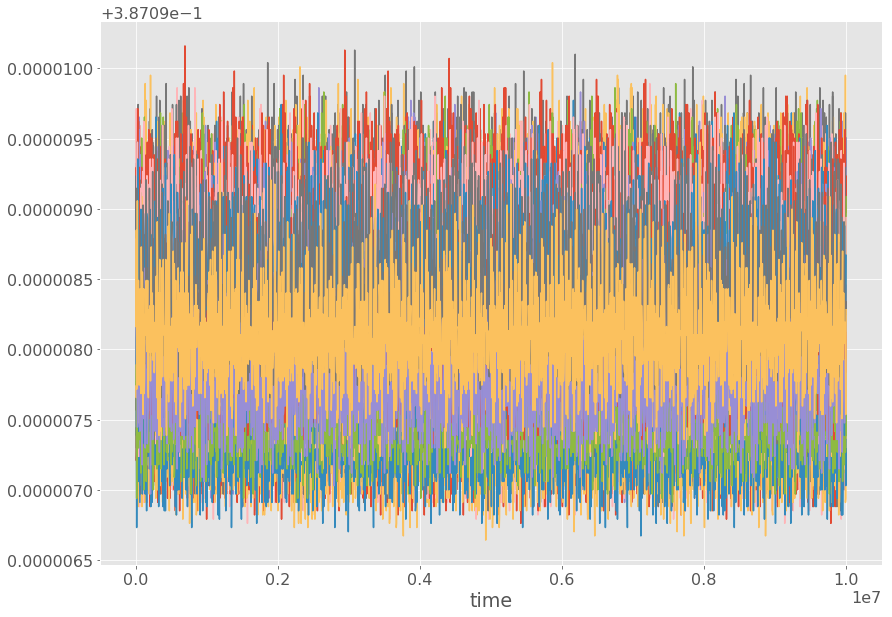

In [28]:
mercury.set_index('time').plot.line(legend=False, figsize=(14,10))

In [33]:
time = data_planet.loc['Mercury']['time']
venus = data_planet.loc['Venus']
earth = data_planet.loc['Earth']
mars = data_planet.loc['Mars']

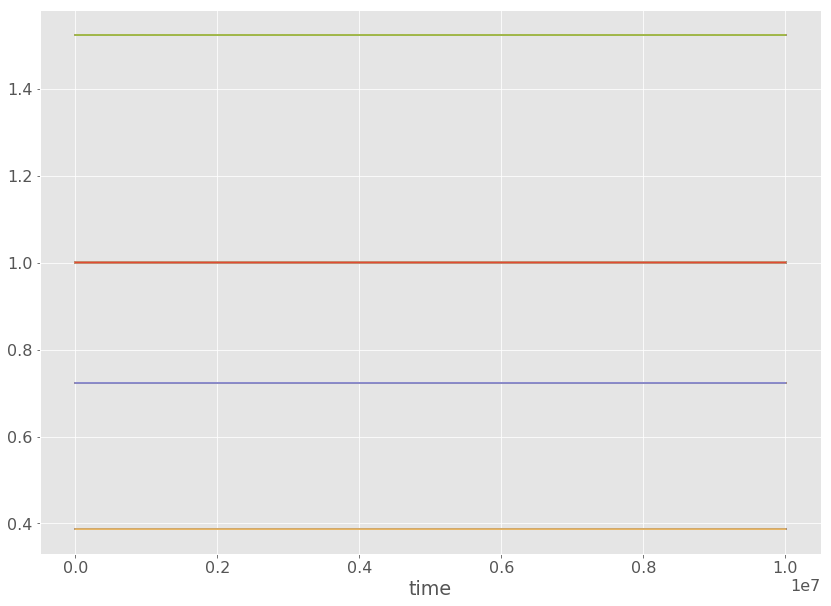

In [44]:
ax = plt.gca()
inners = planets[0:4]
for planet in inners:
    data_planet.loc[planet].set_index('time').plot(ax = ax, legend=False, figsize=(14,10))

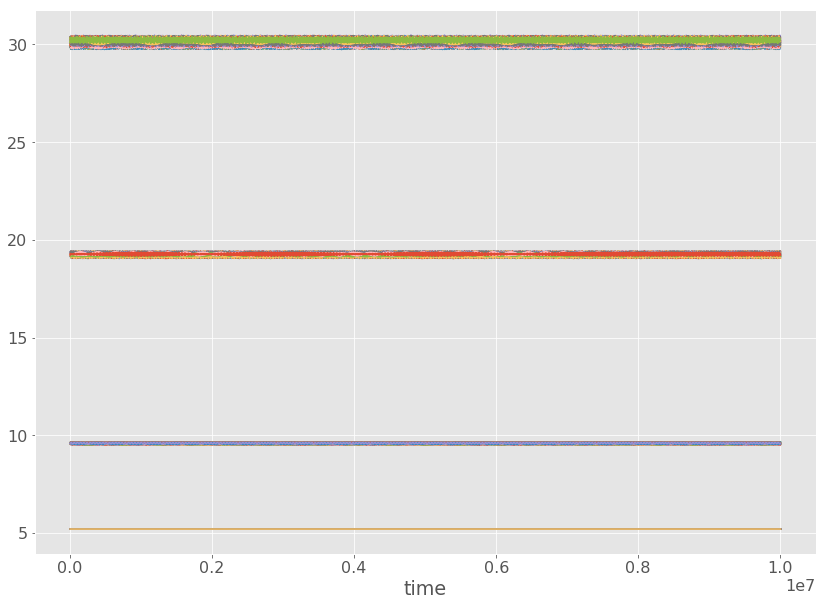

In [47]:
ax = plt.gca()
giants = planets[4:8]
for planet in giants:
    data_planet.loc[planet].set_index('time').plot(ax = ax, legend=False, figsize=(14,10))